# Demo2: Simple Harmonic Oscillator with RK2/RK4

In this jupyter notebook, we will learn how to use the Runge-Kutta 2/4 methods to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
\frac{dx}{dt} = v,
$$
and 
$$
\frac{dv}{dt} = a.
$$


### Runge-Jutta methods

Higher-order explicit schemes.

* RK2

$$
y_{k+1} = y_k + \frac{h_k}{2}(k_1 + k2),
$$
where $k_1 = f(t_k, y_k)$ and $k_2 = f(t_k+h_k, y_k + h_k k1)$.

* RK4

$$
y_{k+1} = y_k + \frac{h_k}{6}(k_1 +2k_2 +2k_3+k_4),
$$
where $k_1= f(t_k,y_k)$, $k_2=f(t_k+h_k/2, y_k + (h_k/2)k_1)$,
$k_3=f(t_k+h_k/2, y_k + (h_k/2)k_2)$, and $k_4=f(t_k+h_k, y_k+h_k k3)$.


### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: Redo demo1 with the RK2 method
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [66]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [91]:
# another version of euler method different from demo1
def solve_shm_euler(y, dt=0.01, tmax=20, A=1, k=1, m=1):

    times = np.linspace(0, tmax, int(tmax/dt)+1, endpoint=True)
    posx = np.zeros(len(times))
    velx = np.zeros(len(times))

    posx[0] = y[0] # access y[x, v] when calling function 
    velx[0] = y[1]

    for n in np.arange(1,len(times)):

        def f(y):
            return np.array([y[1], -omega0**2 * y[0]]) #f = (v, a) = f(t, y)
        
        y = y + dt*f(y) # Euler's method

        posx[n] = y[0]
        velx[n] = y[1]

    return times, posx, velx

In [92]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK2 method
#
def solve_shm_rk2(y, dt=0.01, tmax=20, A=1, k=1, m=1):

    # Step 1: set up the parameters of the problem
    omega0 = np.sqrt(k/m)

    # Step 2: set up the time and solution arrays
    times = np.linspace(0, tmax, int(tmax/dt)+1, endpoint=True)
    posx = np.zeros(len(times))
    velx = np.zeros(len(times))
    
    # Step 3: set up the initial conditions
    posx[0] = y[0] # access y[x, v] when calling function 
    velx[0] = y[1]

    # Step 4: solve the difference equation using the Euler method
    for n in np.arange(1,len(times)):

        # Here, y = (x, v); y' = (v, a) = (v, -omega0**2*x) = f(t, y)
        # f(t,y)=f(y), since t doens't contribute to a
        def f(y):
            return np.array([y[1], -omega0**2 * y[0]]) #f = (v, a) = f(t, y)
        
        # y = y + dt*f(t, y) # Euler's method
        k1 = f(y)
        k2 = f(y+dt*k1)
        y = y + dt/2*(k1+k2) # y initially is given by calling function
   
        # store information
        posx[n] = y[0]
        velx[n] = y[1]

    return times, posx, velx

In [93]:
t_rk2, posx_rk2, velx_rk2 = solve_shm_rk2([1,0], dt=0.01, tmax=20, A=1, k=1, m=1)


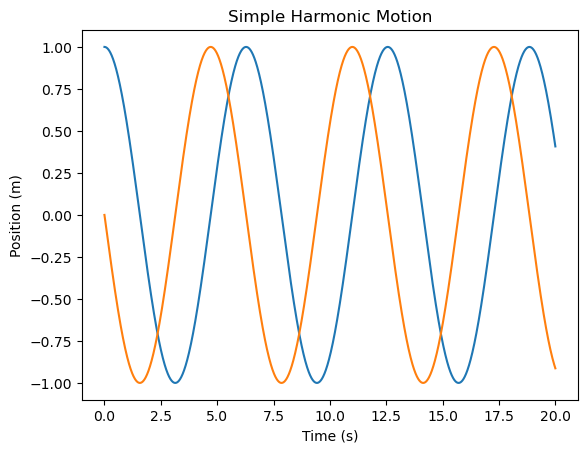

In [73]:
# Step 5: plot the solution
plt.plot(t_rk2,posx_rk2)
plt.plot(t_rk2,velx_rk2)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

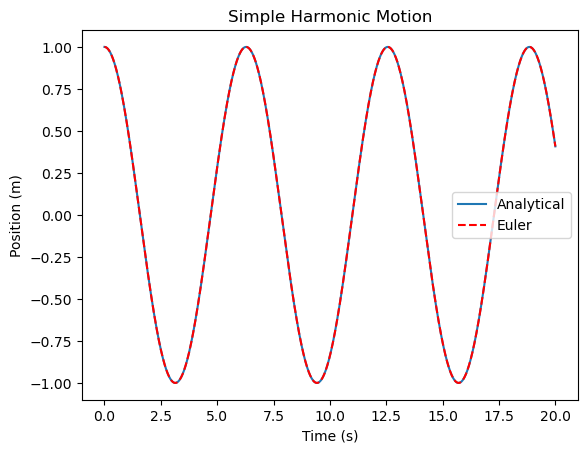

In [74]:
# Step 6: evaluate the analytical solution
posx_analytical = A*np.cos(omega0*times)
plt.plot(t_rk2,posx_analytical,'-',label='Analytical')
plt.plot(t_rk2,posx_rk2,'r--',label='Euler')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.show()

Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

Text(0.5, 1.0, 'Energy of the System')

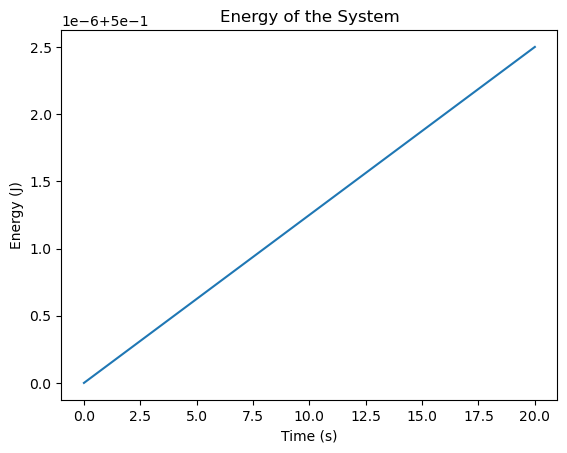

In [79]:
# Step 7: evaluate the energy (error) of the system
m = k =1
energy_rk2 = 0.5*m*velx_rk2**2 + 0.5*k*posx_rk2**2

plt.plot(t_rk2,energy_rk2)
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of the System')

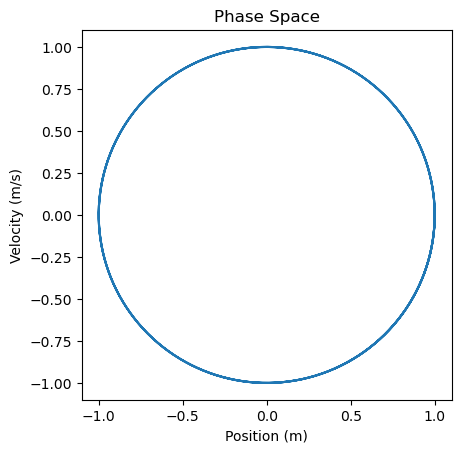

In [84]:
# Step 8: evaluate the phase space

plt.figure()
plt.plot(posx_rk2,velx_rk2)
plt.gca().set_aspect('equal', adjustable='box') #adjust axes
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title('Phase Space')
plt.show()

## Exercise 2: Repeat with RK4


In [94]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK2 method
#
def solve_shm_rk4(y, dt=0.01, tmax=20, A=1, k=1, m=1):

    # Step 1: set up the parameters of the problem
    omega0 = np.sqrt(k/m)

    # Step 2: set up the time and solution arrays
    times = np.linspace(0, tmax, int(tmax/dt)+1, endpoint=True)
    posx = np.zeros(len(times))
    velx = np.zeros(len(times))
    
    # Step 3: set up the initial conditions
    posx[0] = y[0] # access y[x, v] when calling function 
    velx[0] = y[1]

    # Step 4: solve the difference equation using the Euler method
    for n in np.arange(1,len(times)):

        # Here, y = (x, v); y' = (v, a) = (v, -omega0**2*x) = f(t, y)
        # f(t,y)=f(y), since t doens't contribute to a
        def f(y):
            return np.array([y[1], -omega0**2 * y[0]]) #f = (v, a) = f(t, y)
        
        # y = y + dt*f(t, y) # Euler's method
        k1 = f(y)
        k2 = f(y+dt/2*k1)
        k3 = f(y+dt/2*k2)
        k4 = f(y+dt*k3)
        y = y + dt/6*(k1+2*k2+2*k2+k3) # y initially is given by calling function
   
        # store information
        posx[n] = y[0]
        velx[n] = y[1]

    return times, posx, velx

In [95]:
# calling function
t_euler, posx_euler, velx_euler = solve_shm_euler([1,0], dt=0.01, tmax=20, A=1, k=1, m=1)
t_rk2, posx_rk2, velx_rk2 = solve_shm_rk2([1,0], dt=0.01, tmax=20, A=1, k=1, m=1)
t_rk4, posx_rk4, velx_rk4 = solve_shm_rk4([1,0], dt=0.01, tmax=20, A=1, k=1, m=1)

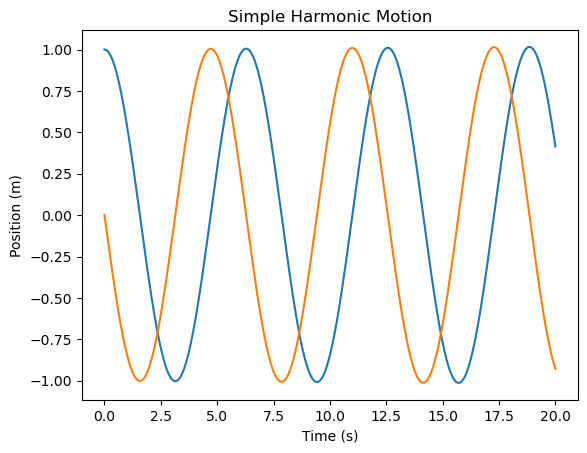

In [97]:
# Step 5: plot the solution
plt.plot(t_rk4,posx_rk4)
plt.plot(t_rk4,velx_rk4)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()

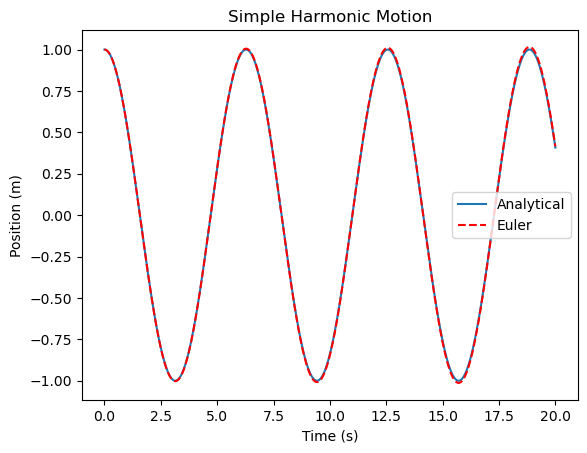

In [98]:
# Step 6: evaluate the analytical solution
posx_analytical = A*np.cos(omega0*times)
plt.plot(t_rk4,posx_analytical,'-',label='Analytical')
plt.plot(t_rk4,posx_rk4,'r--',label='Euler')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Energy of the System')

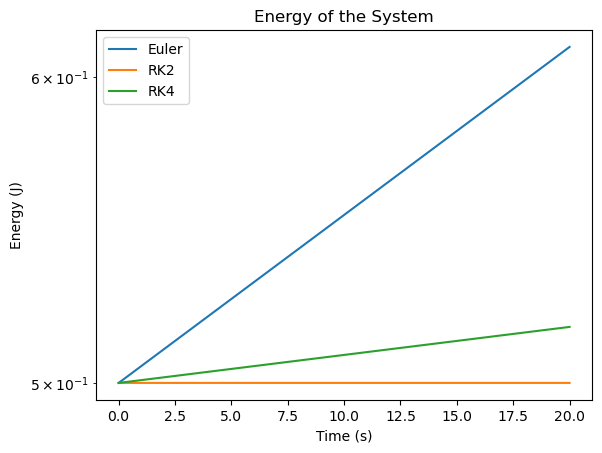

In [101]:
# Step 7: evaluate the energy (error) of the system
m = k =1
energy_euler = 0.5*m*velx_euler**2 + 0.5*k*posx_euler**2
energy_rk2 = 0.5*m*velx_rk2**2 + 0.5*k*posx_rk2**2
energy_rk4 = 0.5*m*velx_rk4**2 + 0.5*k*posx_rk4**2

plt.plot(t_euler,energy_euler, label = 'Euler')
plt.plot(t_rk2,energy_rk2, label = 'RK2')
plt.plot(t_rk4,energy_rk4, label = 'RK4')
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()
plt.title('Energy of the System')

In [59]:
def convergence(dts, method="Euler"):
    """ dts: an numpy array of the tim steps to use
        method: a string specifying the method to use. Default is "Euler
        Return: 
        errs: an numpy array of errors for each time step"""
    errs = np.zeros(len(dts)):
    return errs

In [ ]:
dts = np.logspace(-4, -1, 10)
